# STRES DETECTION ON SOCIAL MEDIA (REDDIT)

- DIONISIUS TYOGO DJATMIKO UTOMO - 2602099762

- BERNARDUS IGNASIO - 260203913

- EVAN SOMANGKEY - 262070093

# DATASET INITIALIZATION

IMPORT LIBRARY

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [32]:
trains = pd.read_csv('dreaddit-train.csv')
test = pd.read_csv('dreaddit-test.csv')
train = pd.concat([test,trains])

In [176]:
train.shape

(3553, 113)

In [34]:
train=pd.concat([test,trains])

In [117]:
print(train.shape)
train.head()

(3553, 113)


,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,7,like want problem take longer ask friend help ...,0,0.8,1.514981e+09,22,-1.238793,55,2.82,57.22,55.41,5.95,11.00,7.27,94.55,67.27,29.09,18.18,5.45,0.00,9.09,3.64,0.00,10.91,0.00,12.73,7.27,1.82,14.55,7.27,18.18,1.82,3.64,1.82,5.45,0.00,1.82,0.00,1.82,0.00,0.0,0.00,20.00,0.0,1.82,0.0,3.64,20.00,0.00,0.00,7.27,7.27,0.00,14.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,7.27,3.64,0.00,1.82,1.82,1.82,5.45,10.91,3.64,12.73,0.00,1.82,10.91,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,23.64,12.73,5.45,1.82,0.00,0.00,0.0,0.0,1.82,1.82,0.00,0.00,2.7143,2.8889,2.6,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,1,man front desk titl hr custom servic repres jo...,0,1.0,1.493348e+09,5,7.684583,72,64.56,50.00,31.19,92.40,14.40,25.00,84.72,44.44,9.72,8.33,6.94,1.39,0.00,0.00,0.00,1.39,5.56,11.11,8.33,5.56,8.33,0.00,13.89,1.39,0.00,2.78,2.78,1.39,4.17,4.17,0.00,0.00,0.0,0.00,6.94,0.0,0.00,0.0,1.39,9.72,4.17,1.39,1.39,2.78,0.00,1.39,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,11.11,2.78,2.78,2.78,4.17,0.00,1.39,13.89,1.39,6.94,1.39,4.17,1.39,22.22,0.00,0.0,4.17,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,15.28,6.94,4.17,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,4.17,2.4444,2.8889,3.0,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,6,save much money new housr expens citi googl la...,1,1.0,1.524517e+09,10,2.360408,148,14.79,75.05,62.88,16.15,21.14,10.81,94.59,59.46,23.65,14.19,6.08,2.03,0.68,2.70,2.70,9.46,2.70,12.16,10.14,6.08,9.46,0.68,20.27,4.73,2.70,0.68,1.35,2.03,3.38,1.35,2.03,0.68,0.0,1.35,14.86,0.0,0.68,0.0,2.70,9.46,2.03,0.00,3.38,3.38,0.68,4.05,0.68,0.68,0.00,0.00,2.70,0.0,2.70,0.0,0.0,5.41,2.70,0.00,1.35,1.35,0.00,6.08,12.16,1.35,16.89,2.03,8.11,6.76,0.68,0.00,0.0,2.03,0.0,0.68,2.70,0.0,0.00,0.68,0.68,0.0,17.57,16.22,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.35,0.00,0.00,2.8333,2.9091,3.0,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,6,ex use shoot back want go time matter almost w...,1,0.5,1.524018e+09,5,5.997000,100,32.13,38.19,79.76,12.51,20.00,9.00,92.00,64.00,28.00,17.00,12.00,1.00,2.00,2.00,0.00,11.00,4.00,15.00,6.00,6.00,4.00,2.00,20.00,2.00,2.00,3.00,0.00,2.00,3.00,1.00,2.00,0.00,0.0,1.00,12.00,1.0,1.00,

In [36]:
print(test.shape)
test.head()

(715, 116)


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,55,2.82,57.22,55.41,5.95,11.00,7.27,94.55,67.27,29.09,18.18,5.45,0.00,9.09,3.64,0.00,10.91,0.00,12.73,7.27,1.82,14.55,7.27,18.18,1.82,3.64,1.82,5.45,0.00,1.82,0.00,1.82,0.00,0.0,0.00,20.00,0.0,1.82,0.0,3.64,20.00,0.00,0.00,7.27,7.27,0.00,14.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,7.27,3.64,0.00,1.82,1.82,1.82,5.45,10.91,3.64,12.73,0.00,1.82,10.91,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,23.64,12.73,5.45,1.82,0.00,0.00,0.0,0.0,1.82,1.82,0.00,0.00,2.7143,2.8889,2.6,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,72,64.56,50.00,31.19,92.40,14.40,25.00,84.72,44.44,9.72,8.33,6.94,1.39,0.00,0.00,0.00,1.39,5.56,11.11,8.33,5.56,8.33,0.00,13.89,1.39,0.00,2.78,2.78,1.39,4.17,4.17,0.00,0.00,0.0,0.00,6.94,0.0,0.00,0.0,1.39,9.72,4.17,1.39,1.39,2.78,0.00,1.39,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,11.11,2.78,2.78,2.78,4.17,0.00,1.39,13.89,1.39,6.94,1.39,4.17,1.39,22.22,0.00,0.0,4.17,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,15.28,6.94,4.17,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,4.17,2.4444,2.8889,3.0,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,148,14.79,75.05,62.88,16.15,21.14,10.81,94.59,59.46,23.65,14.19,6.08,2.03,0.68,2.70,2.70,9.46,2.70,12.16,10.14,6.08,9.46,0.68,20.27,4.73,2.70,0.68,1.35,2.03,3.38,1.35,2.03,0.68,0.0,1.35,14.86,0.0,0.68,0.0,2.70,9.46,2.03,0.00,3.38,3.38,0.68,4.05,0.68,0.68,0.00,0.00,2.70,0.0,2.70,0.0,0.0,5.41,2.70,0.00,1.35,1.35,0.00,6.08,12.16,1.35,16.89,2.03,8.11,6.76,0.68,0.00,0.0,2.03,0.0,0.68,2.70,0.0,0.00,0.68,0.68,0.0,17.57,16.22,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1.35,0.00,0.00,2.8333,2.9091,3.0,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,100,32.13,38.19,79.76,12.51,20.00,9.00,92.00,64.00,28.00,1

# EXPLORATORY DATA ANALYSIS


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 2837
Columns: 116 entries, id to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [38]:
train = pd.DataFrame(train)
# Set display option to show all rows
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_column', 150)

In [39]:
print(train.isnull().sum().sort_values(ascending = False))
print('')
# print(test.isnull().sum().sort_values(ascending = False))

id                          0
lex_liwc_focuspresent       0
lex_liwc_informal           0
lex_liwc_death              0
lex_liwc_relig              0
lex_liwc_money              0
lex_liwc_home               0
lex_liwc_leisure            0
lex_liwc_work               0
lex_liwc_time               0
lex_liwc_space              0
lex_liwc_motion             0
lex_liwc_relativ            0
lex_liwc_focusfuture        0
lex_liwc_focuspast          0
subreddit                   0
lex_liwc_risk               0
lex_liwc_reward             0
lex_liwc_power              0
lex_liwc_achieve            0
lex_liwc_affiliation        0
lex_liwc_drives             0
lex_liwc_ingest             0
lex_liwc_sexual             0
lex_liwc_health             0
lex_liwc_body               0
lex_liwc_bio                0
lex_liwc_feel               0
lex_liwc_swear              0
lex_liwc_netspeak           0
lex_liwc_assent             0
lex_liwc_nonflu             0
syntax_fk_grade             0
social_num

In [40]:
train.dtypes

id                            int64
subreddit                    object
post_id                      object
sentence_range               object
text                         object
label                         int64
confidence                  float64
social_timestamp            float64
social_karma                  int64
syntax_ari                  float64
lex_liwc_WC                   int64
lex_liwc_Analytic           float64
lex_liwc_Clout              float64
lex_liwc_Authentic          float64
lex_liwc_Tone               float64
lex_liwc_WPS                float64
lex_liwc_Sixltr             float64
lex_liwc_Dic                float64
lex_liwc_function           float64
lex_liwc_pronoun            float64
lex_liwc_ppron              float64
lex_liwc_i                  float64
lex_liwc_we                 float64
lex_liwc_you                float64
lex_liwc_shehe              float64
lex_liwc_they               float64
lex_liwc_ipron              float64
lex_liwc_article            

In [41]:
train = train.dropna()
train = train.drop(columns=['post_id', 'id', 'sentence_range'])


In [177]:
for i in train.columns:
    print(i)

subreddit
text
label
confidence
social_timestamp
social_karma
syntax_ari
lex_liwc_WC
lex_liwc_Analytic
lex_liwc_Clout
lex_liwc_Authentic
lex_liwc_Tone
lex_liwc_WPS
lex_liwc_Sixltr
lex_liwc_Dic
lex_liwc_function
lex_liwc_pronoun
lex_liwc_ppron
lex_liwc_i
lex_liwc_we
lex_liwc_you
lex_liwc_shehe
lex_liwc_they
lex_liwc_ipron
lex_liwc_article
lex_liwc_prep
lex_liwc_auxverb
lex_liwc_adverb
lex_liwc_conj
lex_liwc_negate
lex_liwc_verb
lex_liwc_adj
lex_liwc_compare
lex_liwc_interrog
lex_liwc_number
lex_liwc_quant
lex_liwc_affect
lex_liwc_posemo
lex_liwc_negemo
lex_liwc_anx
lex_liwc_anger
lex_liwc_sad
lex_liwc_social
lex_liwc_family
lex_liwc_friend
lex_liwc_female
lex_liwc_male
lex_liwc_cogproc
lex_liwc_insight
lex_liwc_cause
lex_liwc_discrep
lex_liwc_tentat
lex_liwc_certain
lex_liwc_differ
lex_liwc_percept
lex_liwc_see
lex_liwc_hear
lex_liwc_feel
lex_liwc_bio
lex_liwc_body
lex_liwc_health
lex_liwc_sexual
lex_liwc_ingest
lex_liwc_drives
lex_liwc_affiliation
lex_liwc_achieve
lex_liwc_power
lex_li

In [81]:
train.describe()
# test.describe()
# train.head()

,subreddit,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,lex_liwc_cogproc,lex_liwc_insight,lex_liwc_cause,lex_liwc_discrep,lex_liwc_tentat,lex_liwc_certain,lex_liwc_differ,lex_liwc_percept,lex_liwc_see,lex_liwc_hear,lex_liwc_feel,lex_liwc_bio,lex_liwc_body,lex_liwc_health,lex_liwc_sexual,lex_liwc_ingest,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,3553.000000,3553.000000,3553.000000,3.553000e+03,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.00000,3553.000000,3553.000000,3553.00000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000
mean,4.609907,0.522657,0.790644,1.517999e+09,19.543203,4.688569,85.929918,35.140816,40.437610,67.622440,33.216364,18.123392,14.863673,92.382378,58.657658,19.825457,14.012184,9.125449,0.767889,0.847557,2.690324,0.580825,5.801368,4.915759,13.385120,10.291798,6.070735,7.626552,2.265837,19.398945,4.396302,2.297250,1.590664,1.430433,2.261396,6.088033,2.679491,3.316009,0.927610,0.918829,0.598840,10.740459,0.726153,0.557067,1.581658,1.943597,13.655815,2.851070,1.72584,1.936704,3.352699,1.55839,4.005846,2.273439,0.587391,0.611722,0.921281,2.611576,0.710498,1.243600,0.216293,0.400771,7.856634,2.716417,1.356572,2.425840,1.365440,0.721179,5.065049,12.312035,1.176887,14.302845,1.998593,6.301894,6.242764,1.853484,0.781759,0.622620,0.773031,0.119234,0.142111,0.824672,0.247450,0.248033,0.120977,0.122246,0.050870,16.989164,6.092857,3.572328,0.212097,0.118551,0.507

Text(0.5, 1.0, 'Stress Label Distribution')

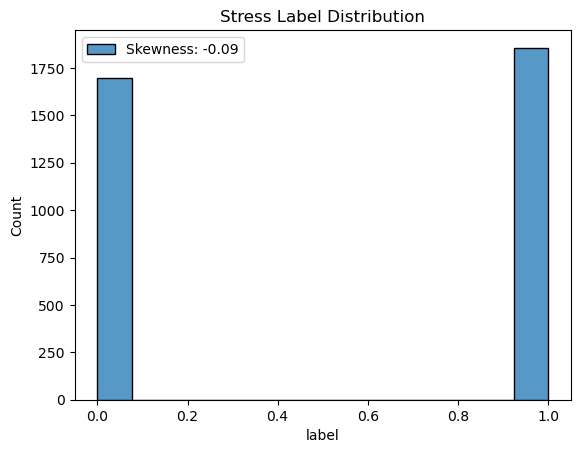

In [45]:
sns.histplot(train['label'], label='Skewness: %.2f'%(train['label'].skew()))
plt.legend(loc = 'best')
plt.title("Stress Label Distribution")

In [46]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


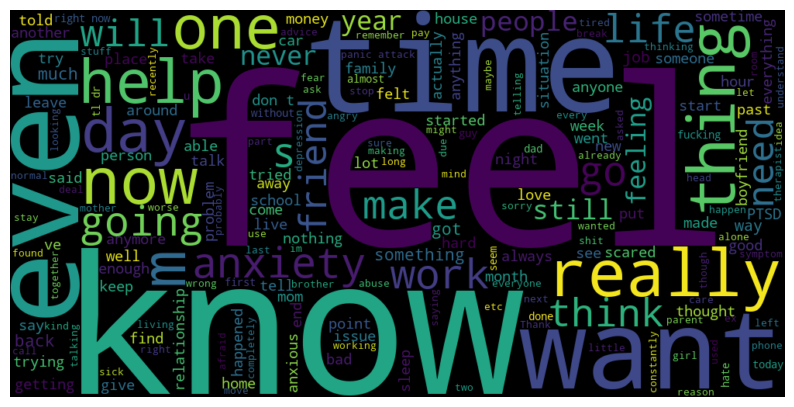

In [47]:
# LABEL = 1 -> NOT STRESS
filtered_texts = train[train['label'] == 1]['text']

text = ' '.join(filtered_texts)

wc = WordCloud(width=1000, height=500, min_font_size=12, stopwords=STOPWORDS)

wc.generate(text)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


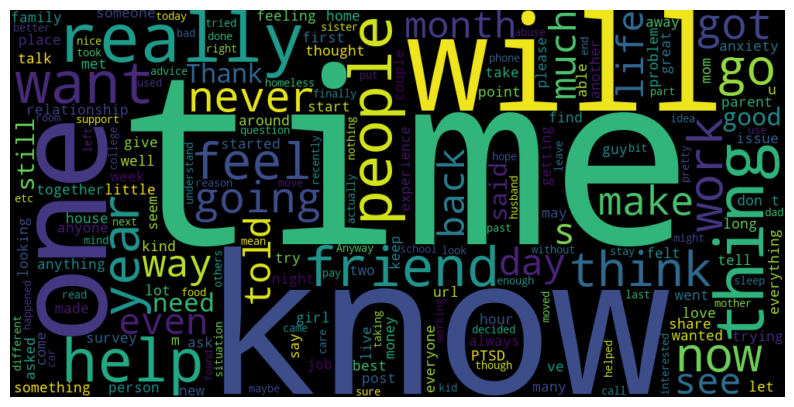

In [48]:
# LABEL = 0 -> STRESS
filtered_texts = train[train['label'] == 0]['text']

text = ' '.join(filtered_texts)

wc = WordCloud(width=1000, height=500, min_font_size=12, stopwords=STOPWORDS)

wc.generate(text)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


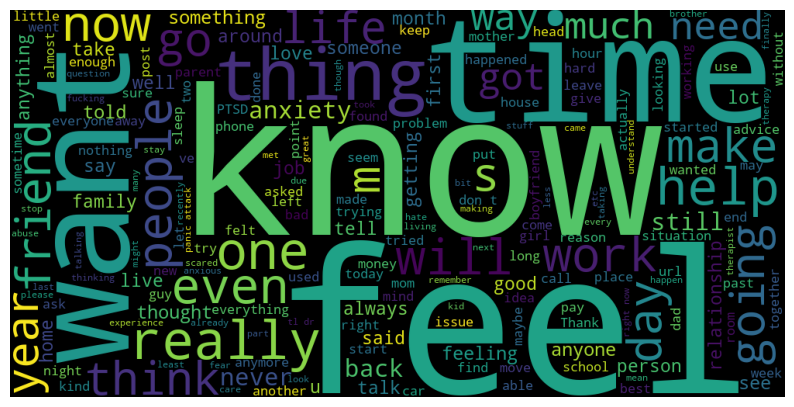

In [49]:
# ALL DATA
wc=WordCloud(width=1000, height=500, min_font_size=12)
wc.generate(''.join(train['text']))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wc)
plt.axis("off")
#plt.tight_layout(pad = 0)

plt.show()

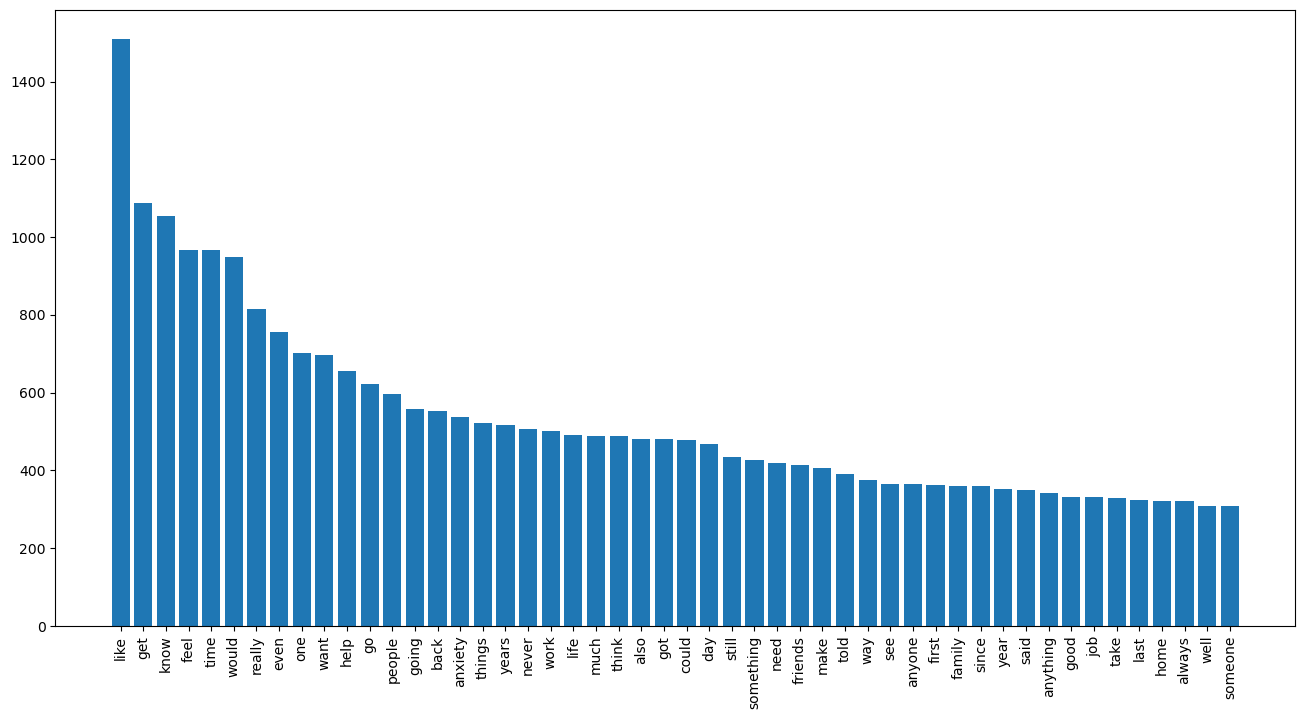

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

def get_n_words(n:int,count_vectorizer:CountVectorizer, text) -> tuple:
    vectorized_count = count_vectorizer.fit_transform(text.values)
    vectorized_total = np.sum(vectorized_count, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:],1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    word_vectors = np.zeros((n, vectorized_count.shape[1]))

    for i in range(n):
        word_vectors[i, word_indices[0,i]] = 1
    words = [word[0] for word in count_vectorizer.inverse_transform(word_vectors)]
    return (words, word_values[0, :n].tolist()[0])

count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
words, word_values = get_n_words(n=50,
                                 count_vectorizer=count_vectorizer,
                                 text=train['text'])
vectorizer = CountVectorizer()

fig,ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
plt.show()

# Feature Importance & Correlation

<AxesSubplot:>

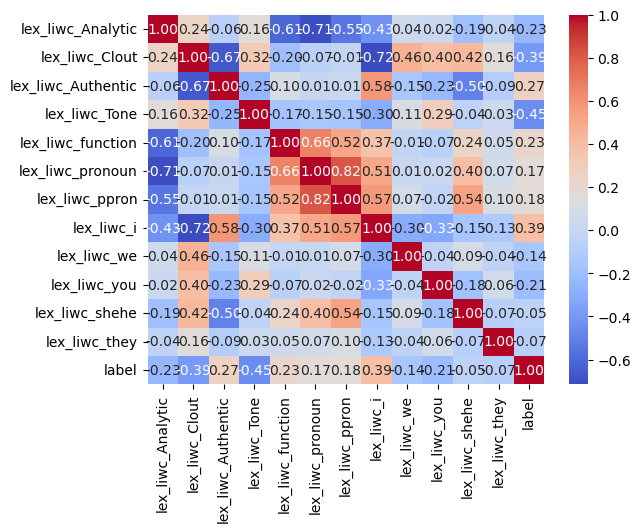

In [51]:
var = 'lex_liwc_Analytic	lex_liwc_Clout	lex_liwc_Authentic	lex_liwc_Tone	lex_liwc_function	lex_liwc_pronoun	lex_liwc_ppron	lex_liwc_i	lex_liwc_we	lex_liwc_you	lex_liwc_shehe	lex_liwc_they'
vars = var.split('\t')
vars.extend(['subreddit', 'label'])
# print(vars)
sns.heatmap(train[vars].corr(), annot=True, fmt='.2f', cmap='coolwarm')

<AxesSubplot:>

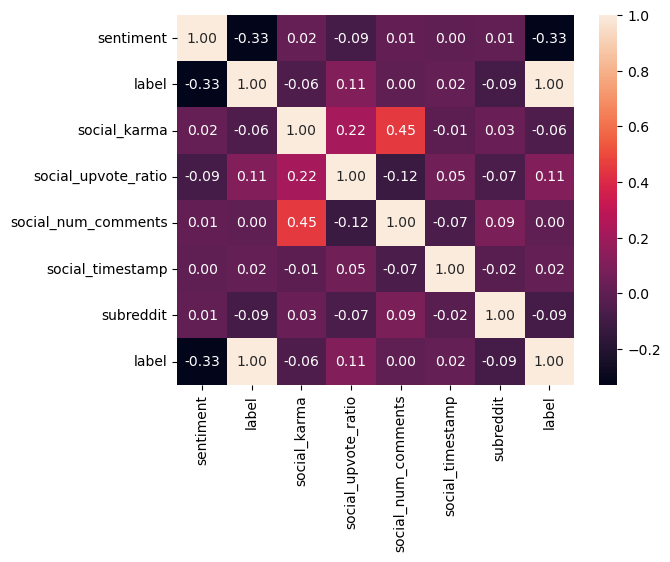

In [183]:
var = "sentiment label social_karma social_upvote_ratio social_num_comments social_timestamp"
vars = var.split(' ')
vars.extend(['subreddit', 'label'])
# print(vars)
sns.heatmap(train[vars].corr(method='spearman'), annot=True, fmt='.2f')#, cmap='coolwarm')

In [ ]:
# FEATURE IMPORTANCE BASED ON RFC

# NLTK FOR text

# PREPROCESSING

In [58]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [59]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tyogo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Text Preprocessing

In [60]:
punctuate=string.punctuation
englishstopwords=stopwords.words('english')

def preprocess_text(text):
  tokens=word_tokenize(text.lower())
  stemmer=SnowballStemmer('english')
  tokens=[stemmer.stem(token) for token in tokens if token.isalpha() and token not in englishstopwords and token not in punctuate]

  return ' '. join(tokens)

train['text'] = train['text'].apply(preprocess_text)
train['text']

0       like want problem take longer ask friend help ...
1       man front desk titl hr custom servic repres jo...
2       save much money new housr expens citi googl la...
3       ex use shoot back want go time matter almost w...
4       said anyth yet sure someon would take hear par...
                              ...                        
2833    week ago precious ignor jan happi year preciou...
2834    abil cope anymor tri lot thing trigger shut wo...
2835    case first time read post look peopl will comp...
2836    find normal good relationship main problem see...
2837    talk mom morn said sister trauma wors mine dev...
Name: text, Length: 3553, dtype: object

Data Preprocessing

In [115]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['subreddit'] = label_encoder.fit_transform(train['subreddit'])

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'text'),  # single text column is fine
        # ('num', Pipeline(steps=[
        #     ('scale', StandardScaler())  # Scale numerical features
        # ]), ['social_timestamp', 'social_upvote_ratio', 'social_num_comments'])  # list of multiple items
    ])

Split Data

In [63]:
feature_cols = [ 'text', 'subreddit','social_timestamp','social_karma','social_upvote_ratio','social_num_comments']
target_col = 'label'

In [64]:
X = train[feature_cols]
y = train[target_col]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# MODEL TRAINING & EVALUATION

Model Evaluation

In [174]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # print(f"{y_test} | {y_pred}")
    y_prob = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
        
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

GridSearch Cross Validation

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'lbfgs', 'saga']
}

pipeline_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)

print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best F1 Score for Logistic Regression: {grid_search_lr.best_score_}")



Best parameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__solver': 'saga'}
Best F1 Score for Logistic Regression: 0.763488034011058


In [73]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

pipeline_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best F1 Score for Random Forest: {grid_search_rf.best_score_}")


Best parameters for Random Forest: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best F1 Score for Random Forest: 0.7585716623082133


In [135]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    #"Logistic Regression": LogisticRegression(random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, solver='lbfgs', random_state=42),
    #"XGBOOST Classifier": xgb.XGBClassifier(n_jobs=-1),
    #"Bagging Classifier": BaggingClassifier(n_estimators=200, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    #"Random Forest": RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=5,n_estimators=200, random_state=42)
    #"SVM": SVC(probability=True, random_state=42),
    #"Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=100,max_features=5)
}



In [175]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
evaluation_results = {}
for model_name, model in models.items():
    evaluation_results[model_name] = train_evaluate_model(model, X_train, y_train, X_test, y_test)

In [152]:
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print()

Model: Logistic Regression
  accuracy: 0.7426160337552743
  precision: 0.715261958997722
  recall: 0.8440860215053764
  f1_score: 0.7743526510480887
  roc_auc: 0.8216290798363308

Model: Random Forest
  accuracy: 0.7327707454289732
  precision: 0.7126168224299065
  recall: 0.8198924731182796
  f1_score: 0.7625000000000001
  roc_auc: 0.8092626954673772



In [169]:
count=0
print("True Value:")
for i in y_test:
    count+=1
    print(i)
    if count ==3:
        break

True Value:
1
1
0


In [171]:
count=0
print("True Value:")
for i in y_pred:
    count+=1
    print(i)
    if count ==3:
        break

Predict Value Logistic Regresion:
1
1
1
Predict Value Random Forest:
1
1
0


Arificial Neural Network